In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install pycocoevalcap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#for scores
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score

from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider

# just a temporary tokenizer, TODO: replace with our tokenizer

In [4]:
# install nltk package
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import nltk
print('Using NLTK version {}.'.format(nltk.__version__))
nltk.download('punkt')

Using NLTK version 3.7.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# MLMI-CXR Report Generation METRICS
## I. BLEU:

Based on the paper: *BLEU: a Method for Automatic Evaluation of Machine Translation* 
-https://aclanthology.org/P02-1040.pdf 

- **RANGE:** [0: low correlation - 1: high correlation]

- **ABOUT:** BLEU (BiLingual Evaluation Understudy) is a
popular metric for Machine Translation (MT) evaluation. It
computes an n-gram based precision for the candidate sentence with respect to the references. The key idea of BLEU
is to compute precision by clipping. Clipping computes precision for a word, based on the maximum number of times
it occurs in any reference sentence. Thus, a candidate sentence saying “The The The”, would get credit for saying
only one “The”, if the word occurs at most once across individual references. BLEU computes the geometric mean
of the n-gram precisions and adds a brevity-penalty to discourage overly short sentences. The most common formulation of BLEU is BLEU4, which uses 1-grams up to 4-grams, though lower-order variations such as BLEU1 (unigram BLEU) and BLEU2 (unigram and bigram BLEU) are
also used. We compute BLEU at the sentence level. For machine
translation BLEU is most often computed at the corpus level
where correlation with human judgment is high; the correlation is **poor at the level of individual sentences**.

- **USAGE:** We use BLEU 1-gram, 2-gram, 3-gram, 4-gram


## II. METEOR:
Based on the paper: *Meteor Universal: Language Specific Translation Evaluation for Any Target Language* 
-https://www.cs.cmu.edu/~alavie/METEOR/

- **RANGE:** [0: low correlation - 1: high correlation]

- **ABOUT:** stands for Metric for Evaluation of Translation with Explicit ORdering. It computes the F-measure based on matches, and returns the maximum score over a set of references as its
judgment of quality. It resolves word-level correspondences in a more sophisticated manner, using exact
matches, stemming and semantic similarity. It optimizes
over matches minimizing chunkiness. Minimizing chunkiness implies that matches should be consecutive, wherever
possible. It also sets parameters favoring recall over precision in its F-measure computation.

- **USAGE:** We use the latest version's (1.5) implementation

## III: ROUGE:
Based on the paper: *ROUGE: A Package for Automatic Evaluation of Summaries* 
-https://aclanthology.org/W04-1013.pdf

- **RANGE:** [0: low correlation - 1: high correlation]

- **ABOUT:** ROUGE stands for Recall Oriented Understudy of Gisting Evaluation. It computes n-gram based recall for the candidate sentence with respect
to the references. It is a popular metric for summarization
evaluation. Versions of ROUGE can be
computed by varying the n-gram count. Two other versions of ROUGE are ROUGE-S and ROUGE-L. These compute an
F-measure with a recall bias using skip-bigrams and longest
common subsequence respectively, between the candidate
and each reference sentence. Skip-bigrams are all pairs of
ordered words in a sentence, sampled non-consecutively.
Given these scores, they return the maximum score across
the set of references as the judgment of quality.

- **USAGE:** We use the Rouge-L (Longest Common Subsequence) implementation

## IV: CIDEr:
Based on the paper: *CIDEr: Consensus-based Image Description Evaluation* 
-https://arxiv.org/pdf/1411.5726.pdf

- **RANGE:** [0: low correlation - 1: high correlation]

- **ABOUT:**  CIDEr is an automatic consensus metric of image
description quality – CIDEr (Consensus-based Image Description Evaluation). It measures the similarity of
a generated sentence against a set of ground truth sentences
written by humans. Using sentence similarity, the notions of grammaticality, saliency, importance and
accuracy (precision and recall) are inherently captured by
this metric.

- **USAGE:** We use the default CIDEr implementation


In [30]:
def compute_scores(out, gt):
    """
    Performs the evaluation of metrics using pycocoevalcap (https://github.com/salaniz/pycocoevalcap)
    :param out: dictionary containing the generated report and the images,
    :param gt: dictionary containing the reports ground truth and the images,
    """
    metrics = [
        (Bleu(4), ["BLEU_1", "BLEU_2", "BLEU_3", "BLEU_4"]),
        (Meteor(), "METEOR"),
        (Rouge(), "ROUGE_L"),
        (Cider(), "CIDER")
    ]

    result = {}
    # Compute score for each metric
    for scorer, method in metrics:
        try:
            score, _ = scorer.compute_score(out, gt, verbose=0)
        except TypeError:
            score, _ = scorer.compute_score(out, gt)
        if type(method) == list:
            for score_i, method_i in zip(score, method):
                result[method_i] = score_i
        else:
            result[method] = score
    return result

In [31]:
generated = "FINAL REPORT CHEST ON  HISTORY:  Status post chest pain.  Evaluate for acute process. FINDINGS:  In comparison with prior study from the study.  A nasogastinal silhouette appears grossly clear.  The lungs are stable."
gen_modif = "FINAL REPORT CHEST ON  HISTORY:  Status post chest pain.  Evaluate for acute process. FINDINGS:  In comparison with prior study from the study.  A nasogastinal silhouette appears grossly clear.  The lungs are stable."

ground_truth = "FINAL REPORT EXAMINATION:  CHEST (PA AND LAT) INDICATION:  History: with shortness of breath TECHNIQUE:  Chest PA and lateral COMPARISON: chest radiograph FINDINGS: Mild to moderate enlargement of the cardiac silhouette is unchanged. The aorta remains tortuous. Mediastinal and hilar contours are otherwise similar. The pulmonary vasculature is not engorged. Lungs are hyperinflated. Apart from minimal atelectasis in the lung bases and biapical scarring in the lung apices, more pronounced on the right, the lungs are clear. No pleural effusion or pneumothorax is demonstrated. There are no acute osseous abnormalities. IMPRESSION: No acute cardiopulmonary abnormality."

In [32]:
# generated = nltk.word_tokenize(generated)
# gen_modif = nltk.word_tokenize(gen_modif)
# ground_truth = nltk.word_tokenize(ground_truth)

In [33]:
img_id = 5151

out_lst = []
out_lst.append(generated)

gt_lst = []
gt_lst.append(gen_modif)

#pycocoevalcap uses dictionary where the id of the image is the key and the value is the generated/ground truth report
out_dict = {img_id: out_lst}
gt_dict = {img_id: gt_lst}

In [34]:
result = compute_scores(out_dict, gt_dict)

In [35]:
result

{'BLEU_1': 0.9999999999375002,
 'BLEU_2': 0.9999999999369961,
 'BLEU_3': 0.9999999999364697,
 'BLEU_4': 0.999999999935919,
 'CIDER': 0.0,
 'METEOR': 1.0,
 'ROUGE_L': 1.0}

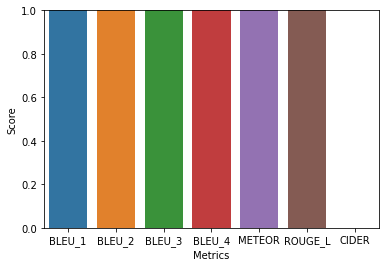

In [36]:
keys = list(result.keys())
vals = list(result.values())
sns.barplot(x=keys, y=vals)
plt.xlabel("Metrics")
plt.ylabel('Score')
#plt.title('')
ax = plt.gca()
ax.set_ylim([0, 1])

plt.show()